In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

# Importar librerias


In [3]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

# Importar funciones personalizadas


In [4]:
%run pandas-missing-extension.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Configurarar el aspecto general de las graficas del proyecto


In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

sns.set_theme(style="whitegrid", context='notebook')


# Operar con valores faltantes


## Python


In [6]:
print(None or True)
print(None or False)
print(None is None)
print(None == None)

print(type(None))

True
False
True
True
<class 'NoneType'>


## Numpy


In [7]:
print(np.nan)
print(np.nan or True)
print(np.nan == np.nan)
print(np.nan is np.nan)
# Si funciona de manera correcta
print(np.nan / 2)

print(type(np.nan))

print(np.isnan(np.nan))

nan
nan
False
True
nan
<class 'float'>
True


## Pandas


In [8]:
test_missing = pd.DataFrame.from_dict(
    data=dict(x=[0, 1, np.nan, np.nan, None], y=[0, 1, pd.NA, np.nan, None])
)

In [9]:
test_missing

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [10]:
test_missing.isna()
# isnull() es un alias de isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [11]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [12]:
pd.Series([pd.to_datetime("2020-01-01"), pd.NaT])

0   2020-01-01
1          NaT
dtype: datetime64[ns]

In [13]:
pd.Series([-1]).isnull()

0    False
dtype: bool

# Conociendo datasets para manejo de datos faltantes


## Pima Indians Diabetes


In [14]:
diabetes_df = pd.read_csv(
    "../data/pima-indians-diabetes.csv",
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ],
)

In [15]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Crear unidades de informacion de los conjuntos de datos


In [16]:
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

In [17]:
datasets_dfs = {}

for dataset_name in datasets_names:
    dataset_file = f"{dataset_name}{extension}"
    dataset_output_file = f"../data/{dataset_file}"

    datasets_dfs[f"{dataset_name}_df"] = pyreadr.read_r(dataset_output_file).get(
        dataset_name
    )


datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

## Incluir conjuntos de datos en nuestro ambiente local


In [18]:
locals().update(**datasets_dfs)

del datasets_dfs

## Verificar Carga


In [19]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape

((736, 8), (37700, 9), (245, 34))

In [20]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

# Tabulacion de valores faltantes


Mostrar los valores faltantes en el dataframe de manera general


In [21]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


# Resumenes basicos de valores faltantes


Fila y columnas del dataFrame

254 registros, 34 variables


In [22]:
# riskfactors_df.size
riskfactors_df.shape

(245, 34)

### Numero total de valores completos (sin observaciones faltantes)


In [23]:
riskfactors_df.missing.number_complete()

7144

### Numero tottal de valores faltantes


In [24]:
riskfactors_df.missing.number_missing()

1186

# Resumenes tabulares de valores faltantes


## Variable / Columnas

Resumen por variable


In [25]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


Tabulacion del resumen por variable


In [26]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


## Casos / Observaciones / Filas


Resumenes por casos


In [27]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


Tabulacion del resumen por caso


In [28]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


## Intervalos de valores faltantes


In [29]:
riskfactors_df.missing.missing_variable_span(variable="weight_lbs", span_every=50)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


## Ruth Length de valores faltantes


In [30]:
riskfactors_df.missing.missing_variable_run(variable="weight_lbs")

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


# Visualizacion inicial de valores faltantes


## Varible

Visualizacion de de los datos faltantes para cada variable mediante un grafico de paleta


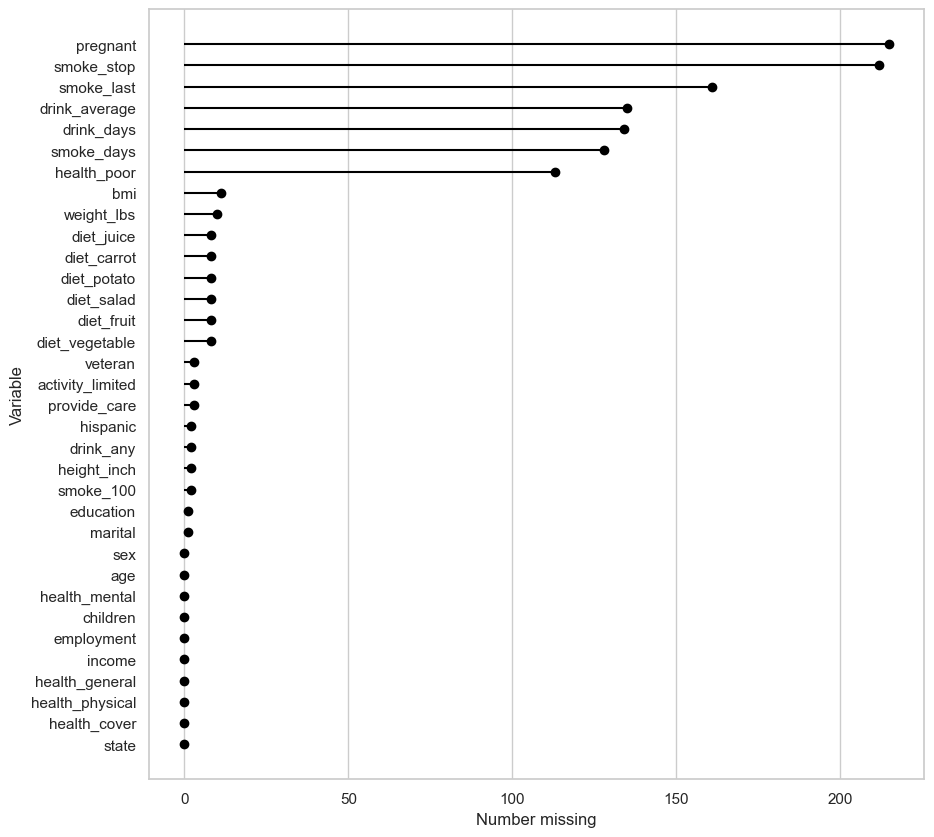

In [31]:
riskfactors_df.missing.missing_variable_plot()

## Casos \ Observaciones \ Filas

Visualizacion de datos faltantes en los registros / Filas


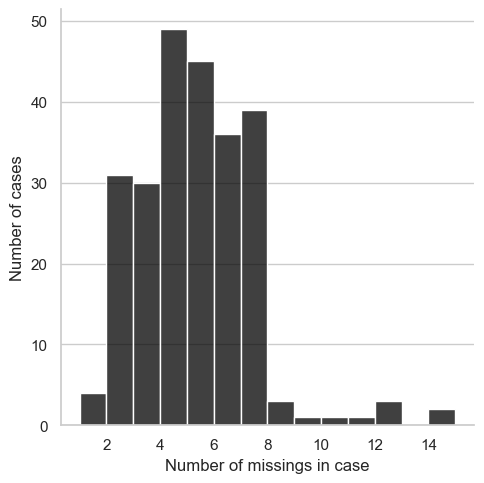

In [32]:
riskfactors_df.missing.missing_case_plot()

Visualizacion de datos faltantes para bloques de 10 registros


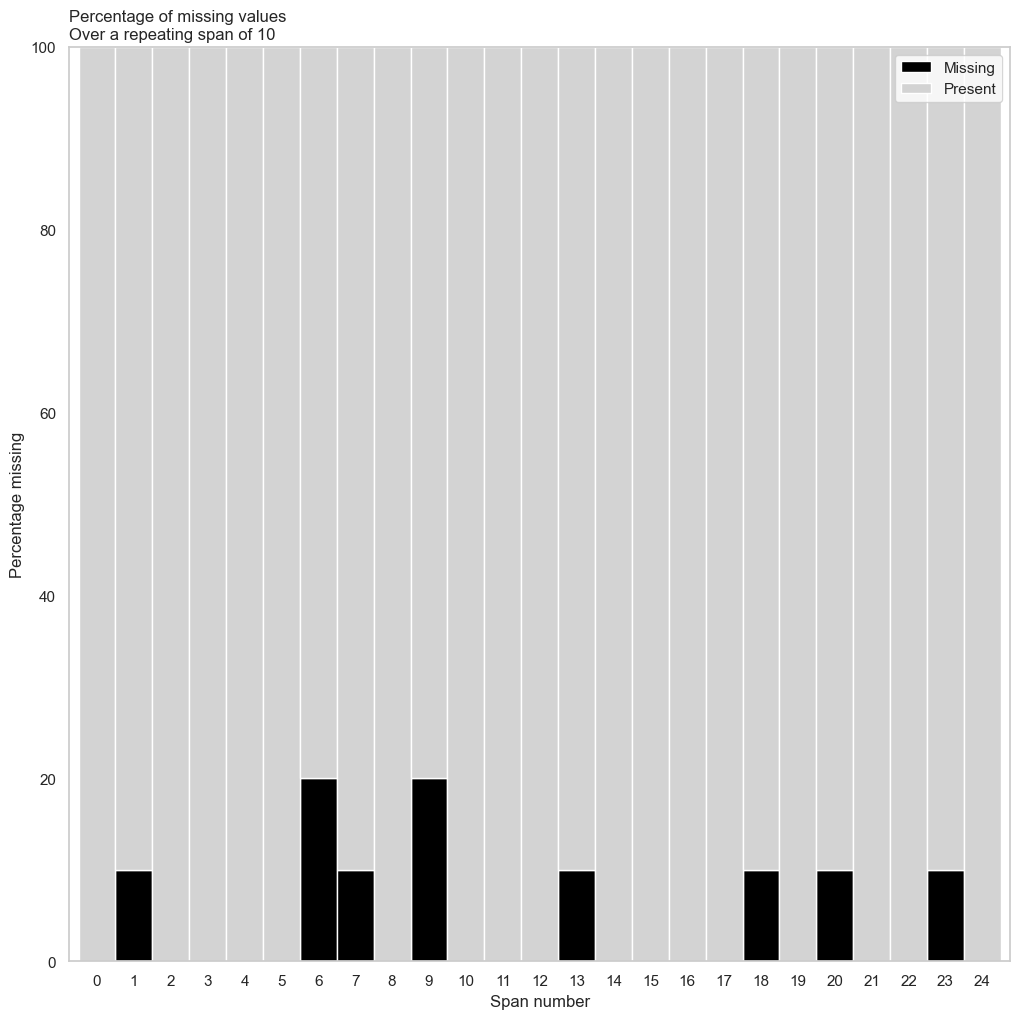

In [33]:
riskfactors_df.missing.missing_variable_span_plot(
    variable="weight_lbs", span_every=10, rot=0
)

Visualizacion de datos faltantes para todas las variables del dataFrame


<Axes: >

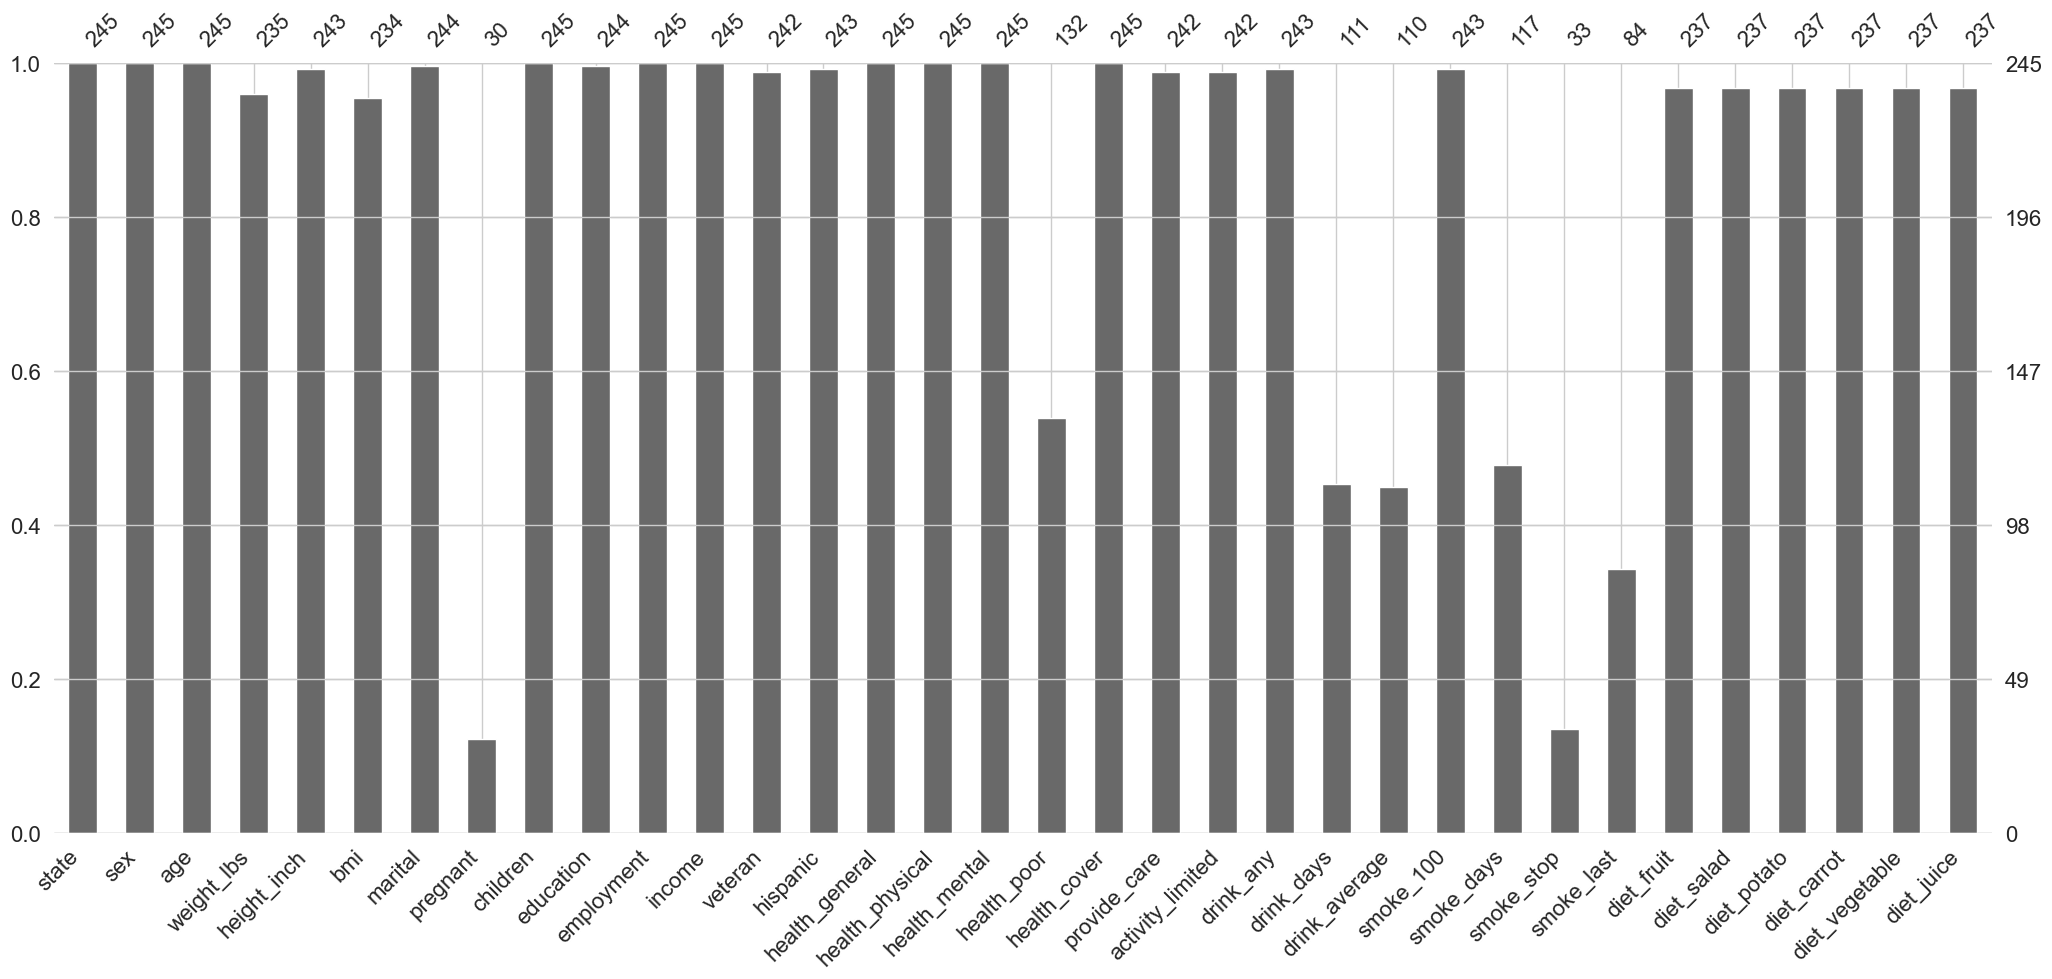

In [34]:
missingno.bar(df=riskfactors_df)

Visualizacion de datos faltantes para cada variable mediante una matriz


<Axes: >

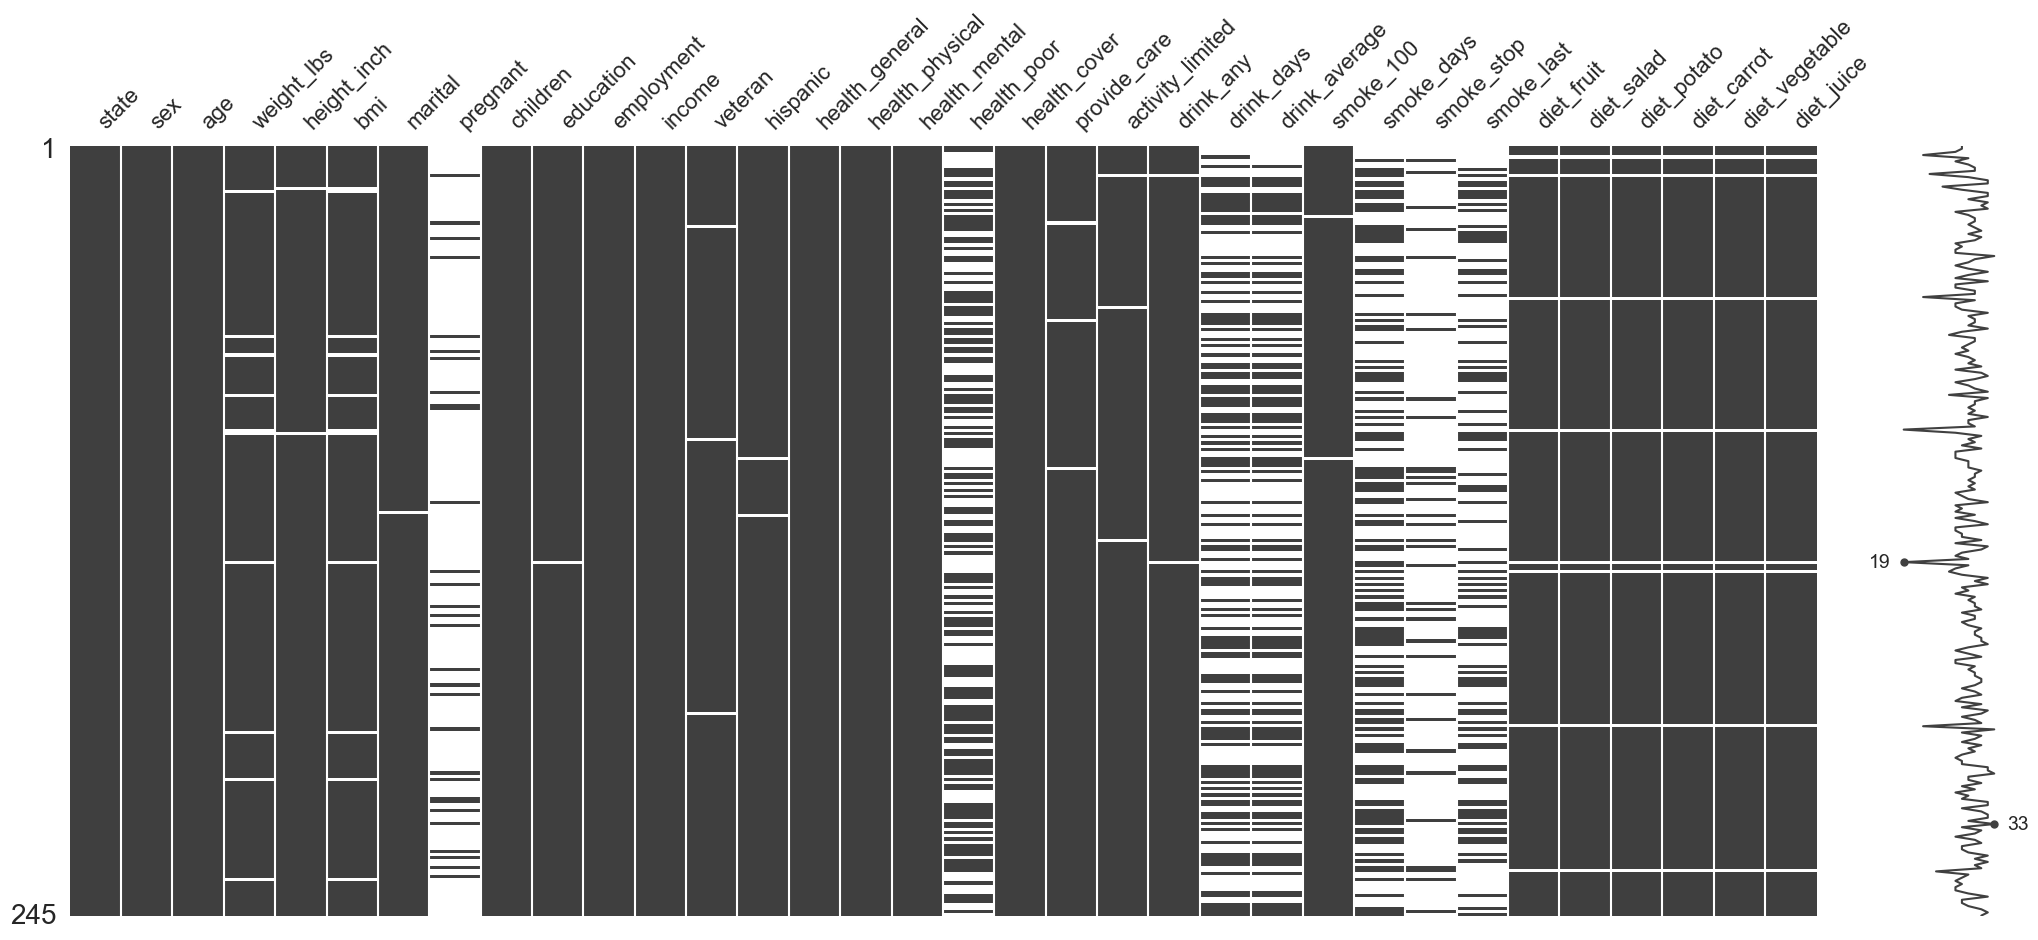

In [35]:
missingno.matrix(df=riskfactors_df)

Visualizacion de apariciones conjuntas de varias variables


c:\Users\mike\Desktop\manejo_datos_faltantes\venv\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\mike\Desktop\manejo_datos_faltantes\venv\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

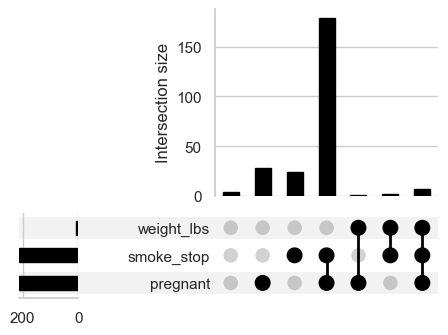

In [36]:
riskfactors_df.missing.missing_upsetplot(
    variables=["pregnant", "weight_lbs", "smoke_stop"], element_size=30
)

# Codificacion de valores faltantes


## Valores comunmente asociados a valores faltantes


### Cadenas de texto


In [37]:
common_na_string = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

### Numeros


In [38]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

## ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?


In [39]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x=[1, 3, "NA", -99, -98, -99],
        y=["A", "N/A", "NA", "E", "F", "G"],
        z=[-100, -99, -98, -101, -1, -1],
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [40]:
missing_data_example_df.missing.number_missing()

0

## Revistar los tipos de datos


In [41]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

## Revisar valores unicos de los datos


In [42]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [43]:
missing_data_example_df.select_dtypes(object).apply(pd.unique)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

# Sustituyendo valores comunmente asociados a valores faltantes


Sustitucion desde la lectura de los datos


In [44]:
pd.read_csv(
    "../data/missing_data_enconding_example.csv", na_filter=True, na_values=[-99, -1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


## Sustitucion global


In [45]:
missing_data_example_df.replace(to_replace=[-99, "NA"], value=np.nan)

C:\Users\mike\AppData\Local\Temp\ipykernel_18236\3319056906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  missing_data_example_df.replace(to_replace=[-99, "NA"], value=np.nan)


,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


## Sustitucion Dirigida


In [46]:
missing_data_example_df.replace(to_replace={"x": {-99: np.nan}, "y": {"NA": np.nan}})

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NaN,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


# Conversión de valores faltantes implícitos en explícitos


In [47]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320],
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


## Estrategia para la identificacion de valores faltantes


### Pivotar la tabla de datos


In [48]:
implicit_to_explicit_df.pivot(index="name", columns="time", values="value")

time,afternoon,morning,night
name,,,
lynn,310.0,350.0,NaN
zelda,NaN,320.0,NaN


### Cuantificar ocurrencias de n-tuplas


In [49]:
implicit_to_explicit_df.value_counts(subset=["name"]).reset_index(name="n").query(
    "n < 3"
)

,name,n
1,zelda,1


# Exponer filas faltantes implicitas en explicitas


## Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de name y time


In [50]:
implicit_to_explicit_df.complete("name", "time")

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0
5,zelda,night,NaN


## Limitar la exposicion de n-tuplas de valores faltantes


In [51]:
implicit_to_explicit_df.complete(
    {"name": ["lynn", "zelda"]}, {"time": ["morning", "afternoon"]}, sort=True
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0


## Rellenar los valores faltantes


In [52]:
implicit_to_explicit_df.complete("name", "time", fill_value=np.nan)

c:\Users\mike\Desktop\manejo_datos_faltantes\venv\Lib\site-packages\janitor\functions\complete.py:308: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  out = out.fillna(fill_value, downcast="infer")


,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0
5,zelda,night,NaN


## Limitar el rellnado de valores faltantes implicitos


In [53]:
implicit_to_explicit_df.complete("name", "time", fill_value=0, explicit=False)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,0.0
4,zelda,morning,320.0
5,zelda,night,0.0


# Tipos de valores faltantes


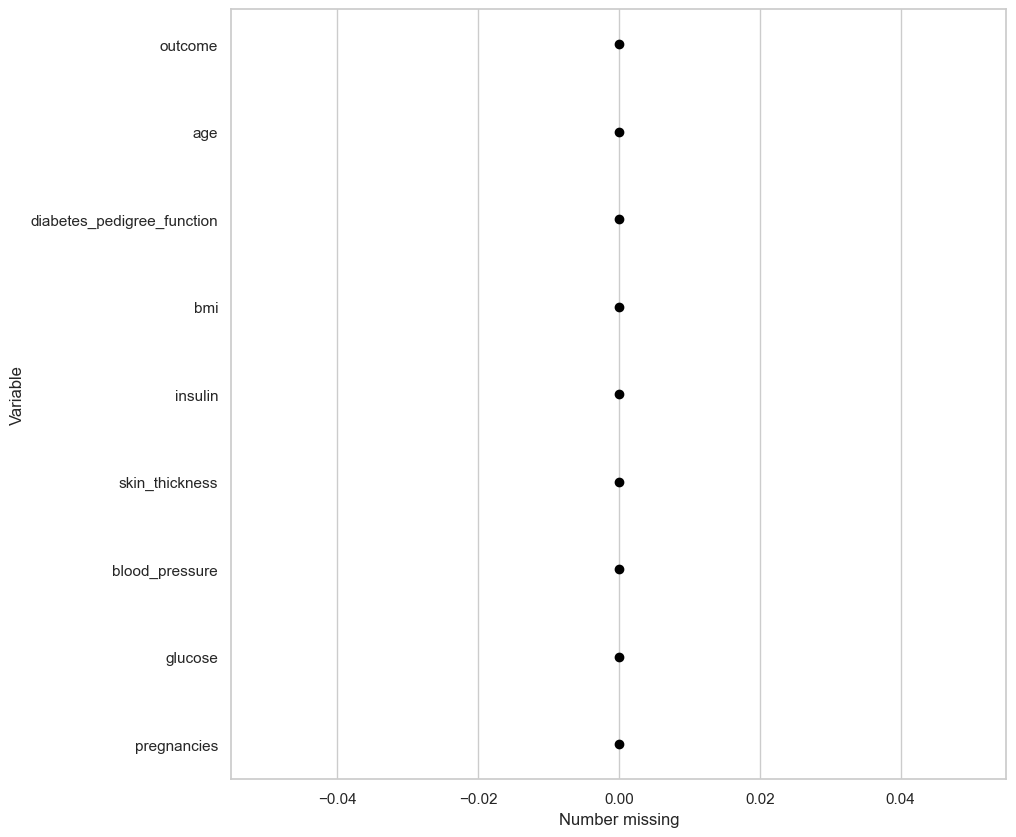

In [54]:
diabetes_df.missing.missing_variable_plot()

In [55]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(
    0, np.nan
)

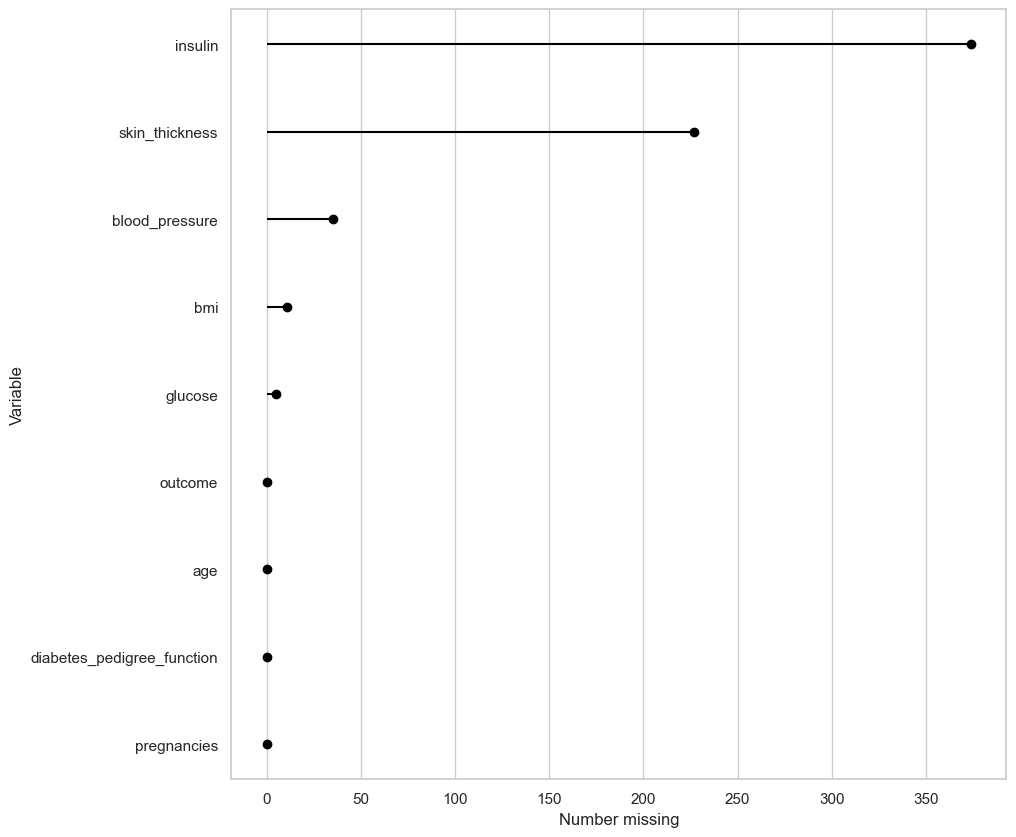

In [56]:
diabetes_df.missing.missing_variable_plot()

## MCAR


<Axes: >

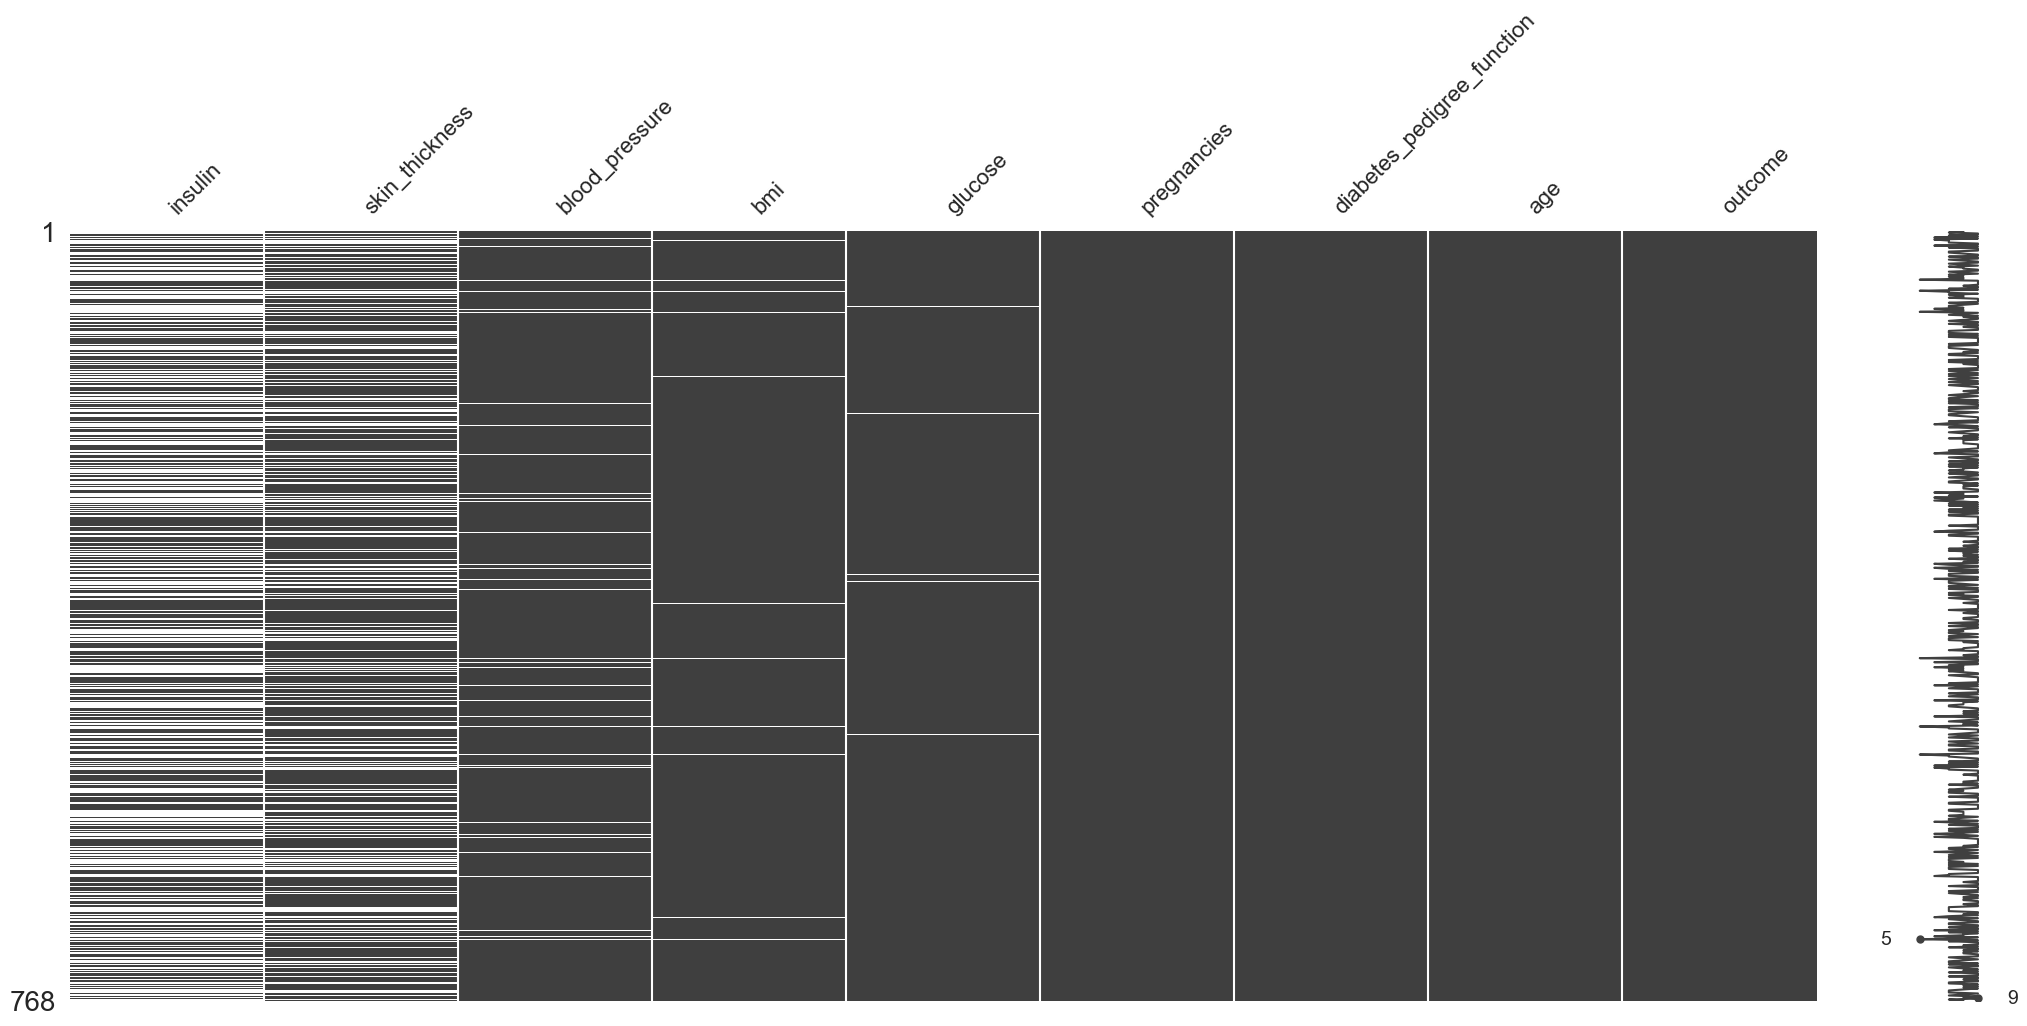

In [57]:
# # ordena las columnas desde la que mas tiene valores faltantes a la que menos tiene
diabetes_df.missing.sort_variables_by_missingness().pipe(missingno.matrix)

Para las variables bmi y glucose hay tan pocos valores faltantes que se pueden considerar valores faltantes al azar


## MAR


<Axes: >

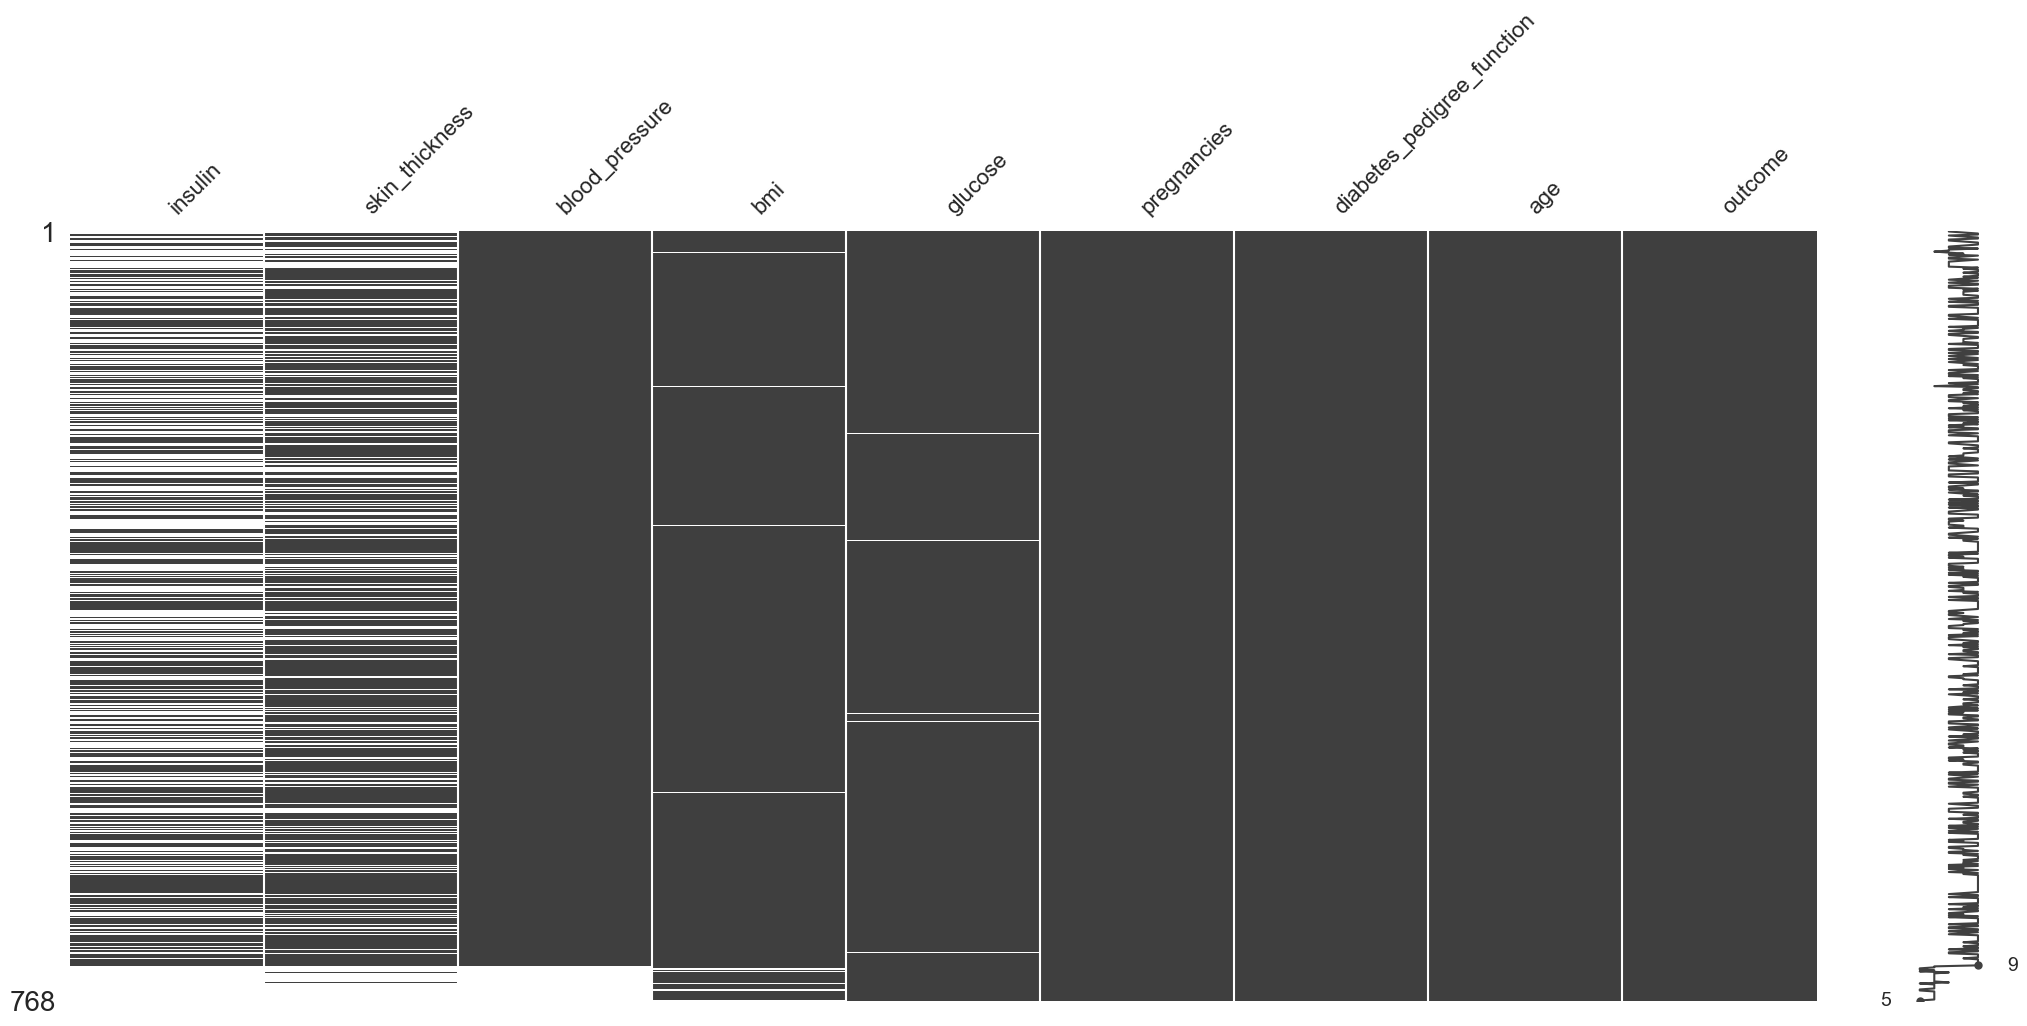

In [58]:
diabetes_df.missing.sort_variables_by_missingness().sort_values(
    by="blood_pressure", ascending=False
).pipe(missingno.matrix)

Los valores faltantes de la variable blood_presure pueden estar relacionado a algunos valores de la insulina o de la skin_thickness por lo que son de tipo MAR.


## MNAR


<Axes: >

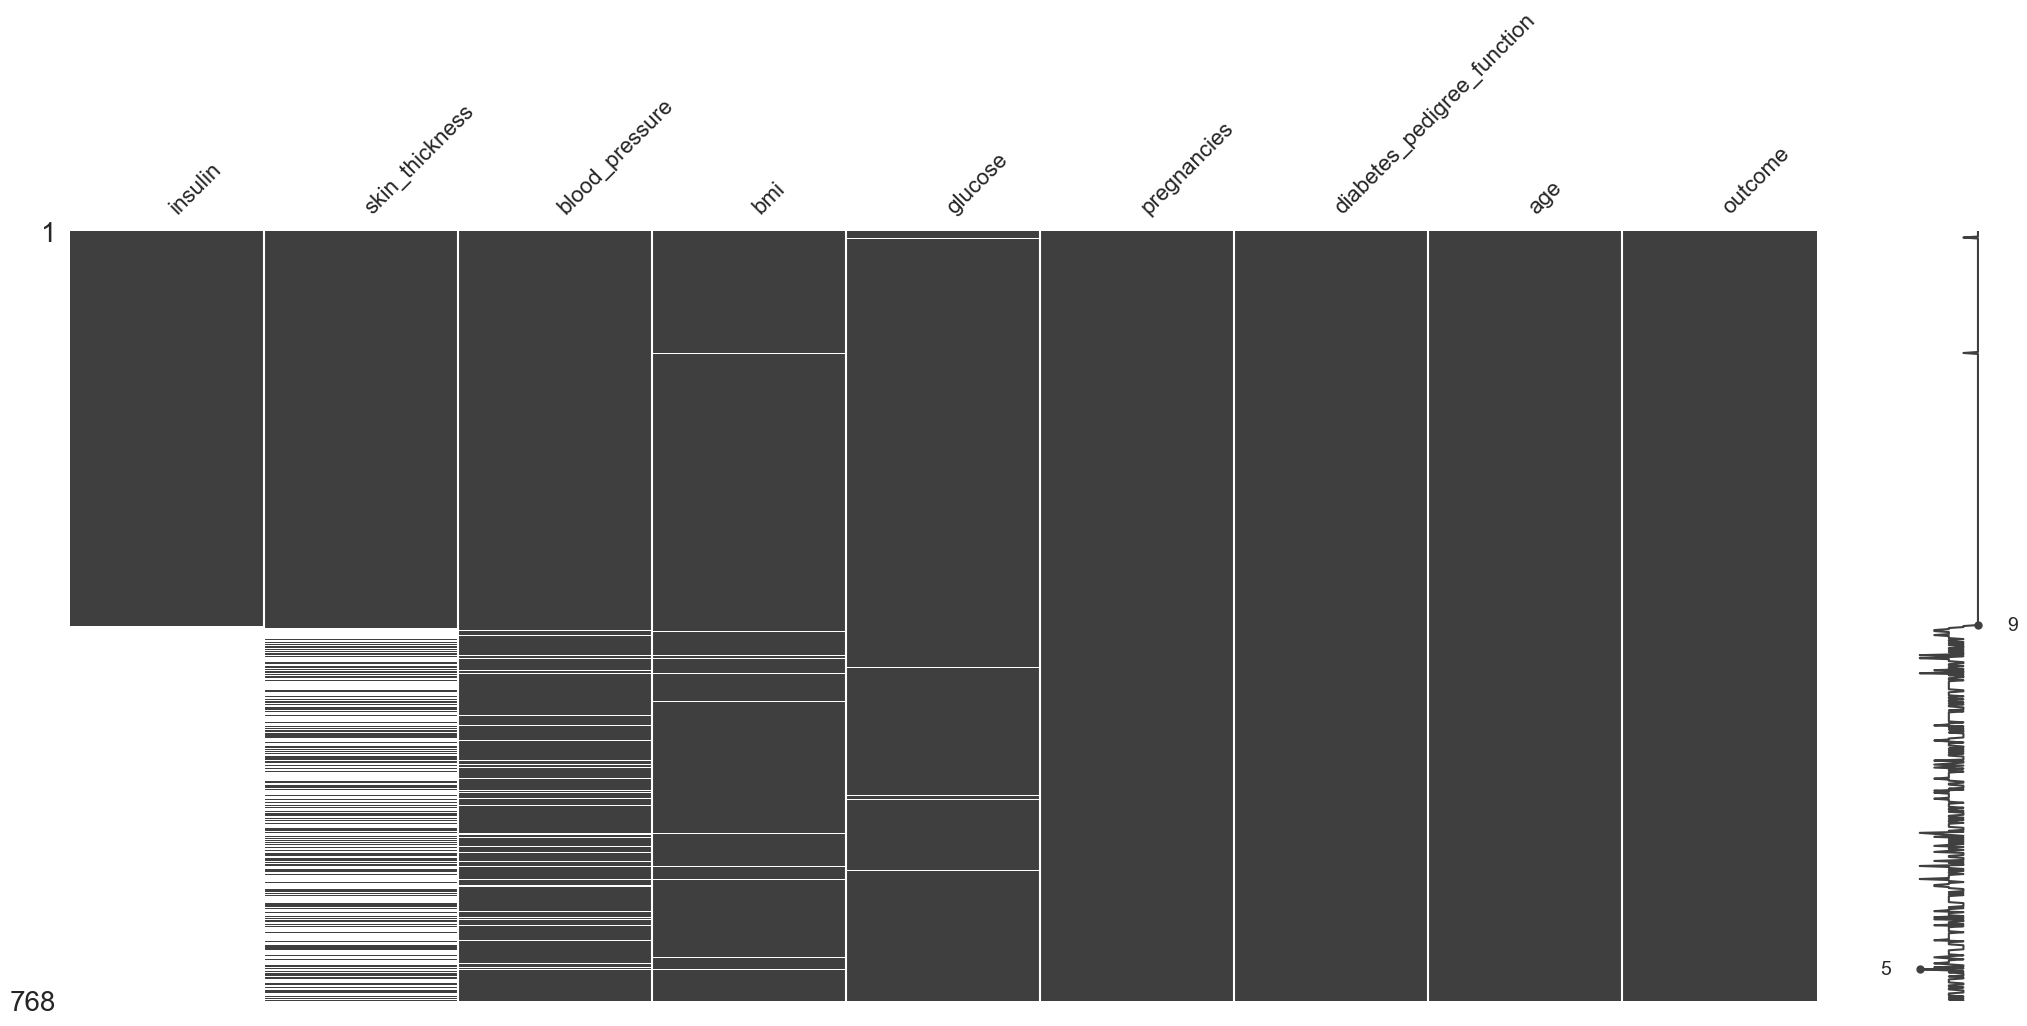

In [59]:
diabetes_df.missing.sort_variables_by_missingness().sort_values(by="insulin").pipe(
    missingno.matrix
)

Hay un rango de valores de insulina en la que estan la mayoria de los valores faltantes de las demas variables de lo que podemos concluir que es de tipo MNAR


# Concepto y aplicacion de la matriz de sombras (i.e, shadow matriz)


## Construccion de la matriz de sombras


In [60]:
# Crea una matriz de booleanos del dataframe
riskfactors_df.isna().replace({False: "Not missing", True: "Missing"}).add_suffix(
    "_NA"
).pipe(lambda shadow_matrix: pd.concat([riskfactors_df, shadow_matrix], axis="columns"))

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


Construcion de la Matriz de Sombra utilizando la funcion de utileria bind_shadow_matrix


## Utilizar funcion de utileria bind_shadow_matrix()


In [61]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


## Explorando estadisticos utilizando las nuevas columnas de la matriz de sombra


In [62]:
# Nos ayuda a encontrar si existe diferencias de alguna variable referente a la ausencia de otra

riskfactors_df.missing.bind_shadow_matrix(only_missing=True).groupby(["weight_lbs_NA"])[
    "age"
].describe().reset_index()

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


# Visualizacion de valores faltantes en una variable


Comparando los datos faltantes de la variable Peso con los valores de la variable Edad


<Axes: xlabel='weight_lbs_NA', ylabel='age'>

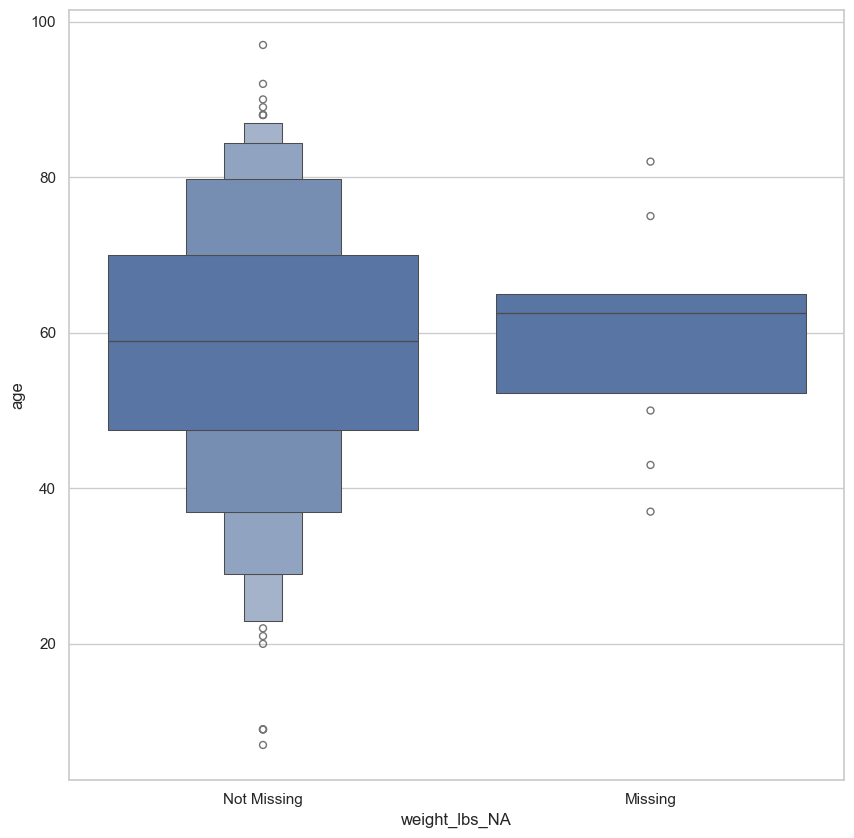

In [63]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(
    lambda df: (sns.boxenplot(data=df, x="weight_lbs_NA", y="age"))
)

Visualizacion alternativa mediante funciones de densidad


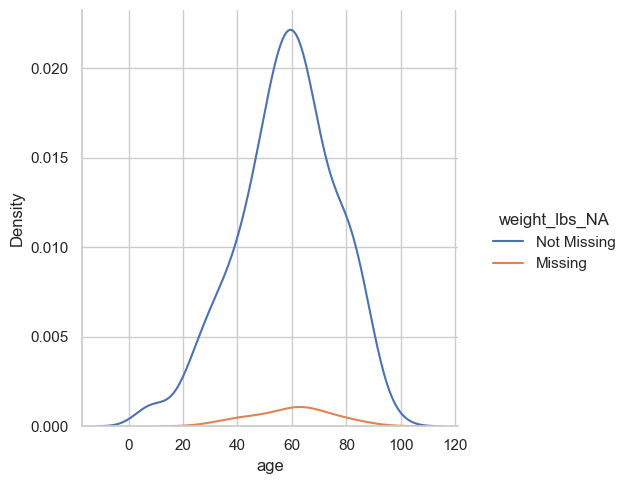

In [64]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(
    lambda df: (sns.displot(data=df, x="age", hue="weight_lbs_NA", kind="kde"))
)

Visualizacion de la variable Edad y los valores faltantes de la variable Peso mediante histogramas independientes. Este tipo de grafico son muy dificiles de comparar debido a que tenemos mas datos que no faltan de los que faltan


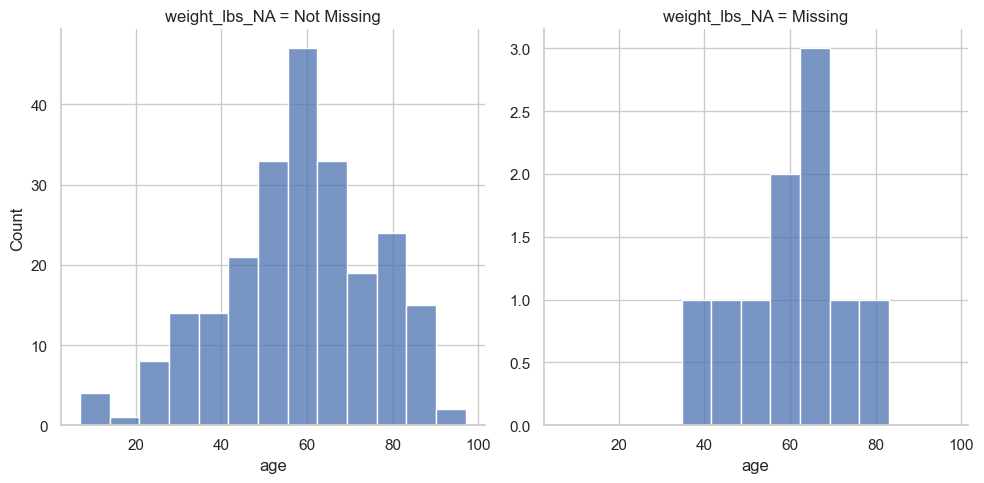

In [65]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(
    lambda df: (
        sns.displot(data=df, x="age", col="weight_lbs_NA", facet_kws={"sharey": False})
    )
)

Grilla de graficos con dos variables de datos faltantes


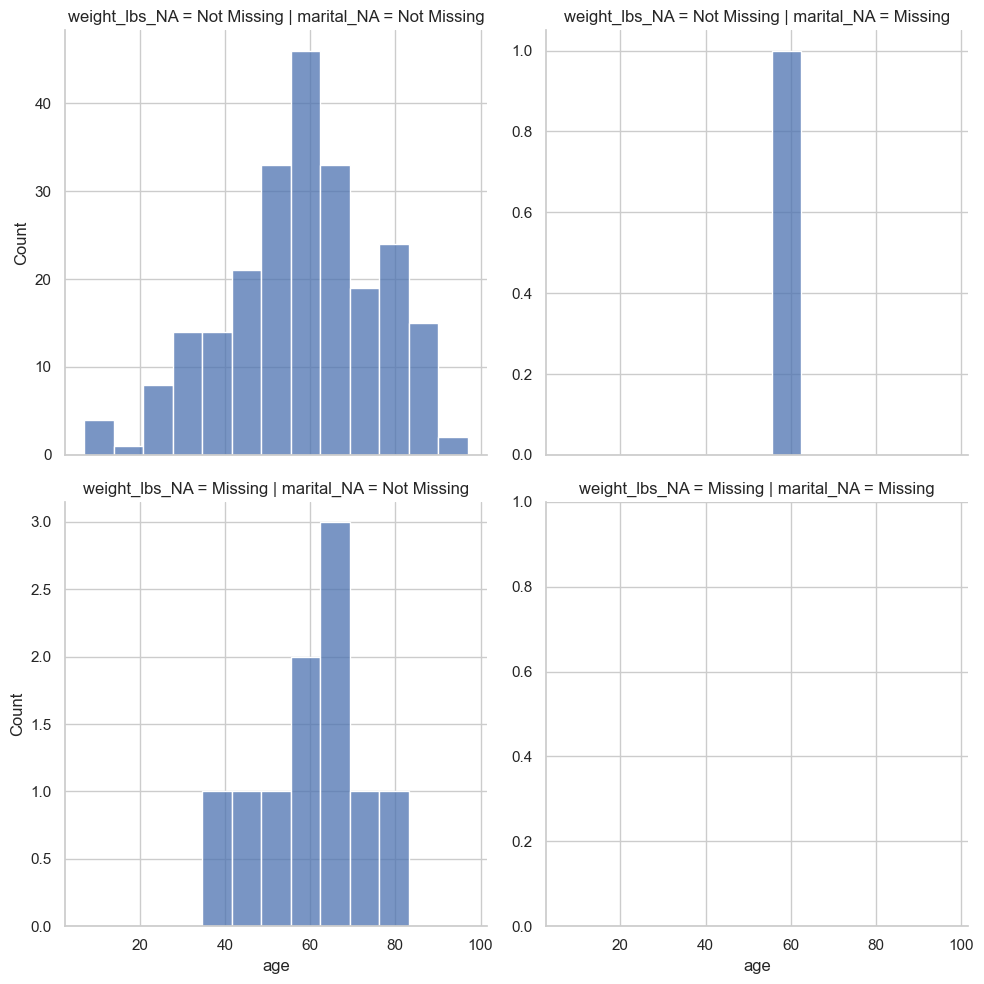

In [66]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(
    lambda df: (
        sns.displot(
            data=df,
            x="age",
            col="marital_NA",
            row="weight_lbs_NA",
            facet_kws={"sharey": False},
        )
    )
)

# Visualizacion de valores faltantes en dos variables


In [67]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float = 0.10,
    jitter: float = 0.075,
    seed: int = 42,
):
    column = column.copy(deep=True)

    # Extract values metadata
    missing_mask = column.isna()

    number_missing_values = missing_mask.sum()

    column_range = column.max() - column.min()

    # Shift data

    column_shift = column.min() - column.min() * proportion_below

    # Create the jitter (noise) to add to the data
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data.

    column[missing_mask] = column_shift + column_jitter

    return column

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

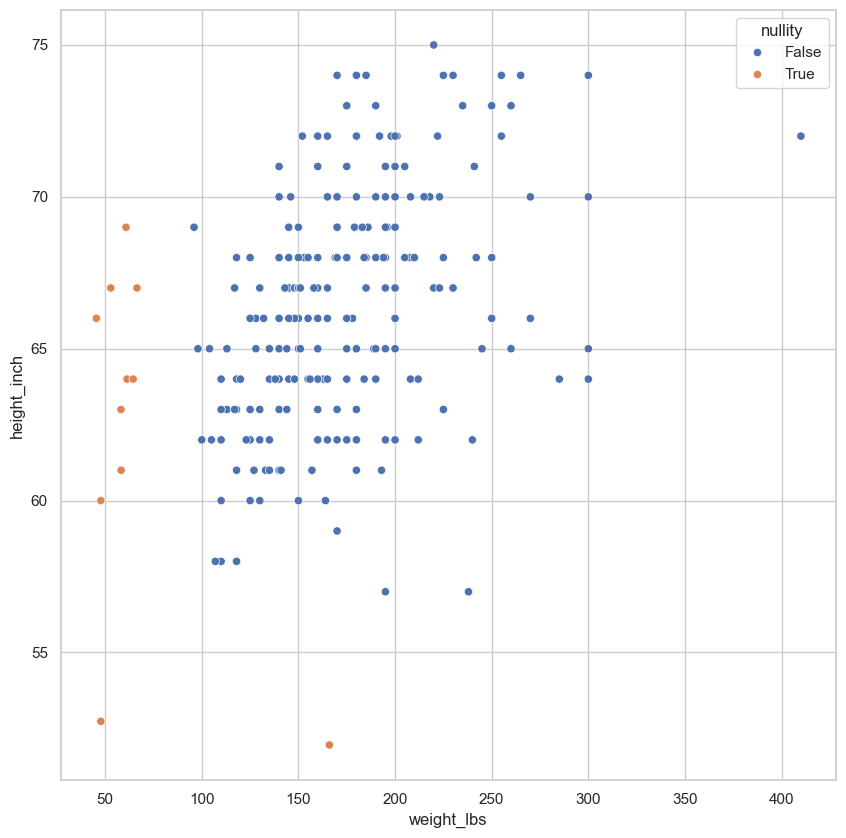

In [68]:
riskfactors_df.select_dtypes(exclude="category").pipe(
    lambda df: df[df.columns[df.isna().any()]]
).missing.bind_shadow_matrix(true_string=True, false_string=False).apply(
    lambda column: (
        column
        if "_NA" in column.name
        else column_fill_with_dummies(
            column, proportion_below=0.05, jitter=0.075, seed=42
        )
    )
).assign(
    nullity=lambda df: df["weight_lbs_NA"] | df["height_inch_NA"]
).pipe(
    lambda df: (
        sns.scatterplot(data=df, x="weight_lbs", y="height_inch", hue="nullity")
    )
)

# Correlacion de nulidad


<Axes: >

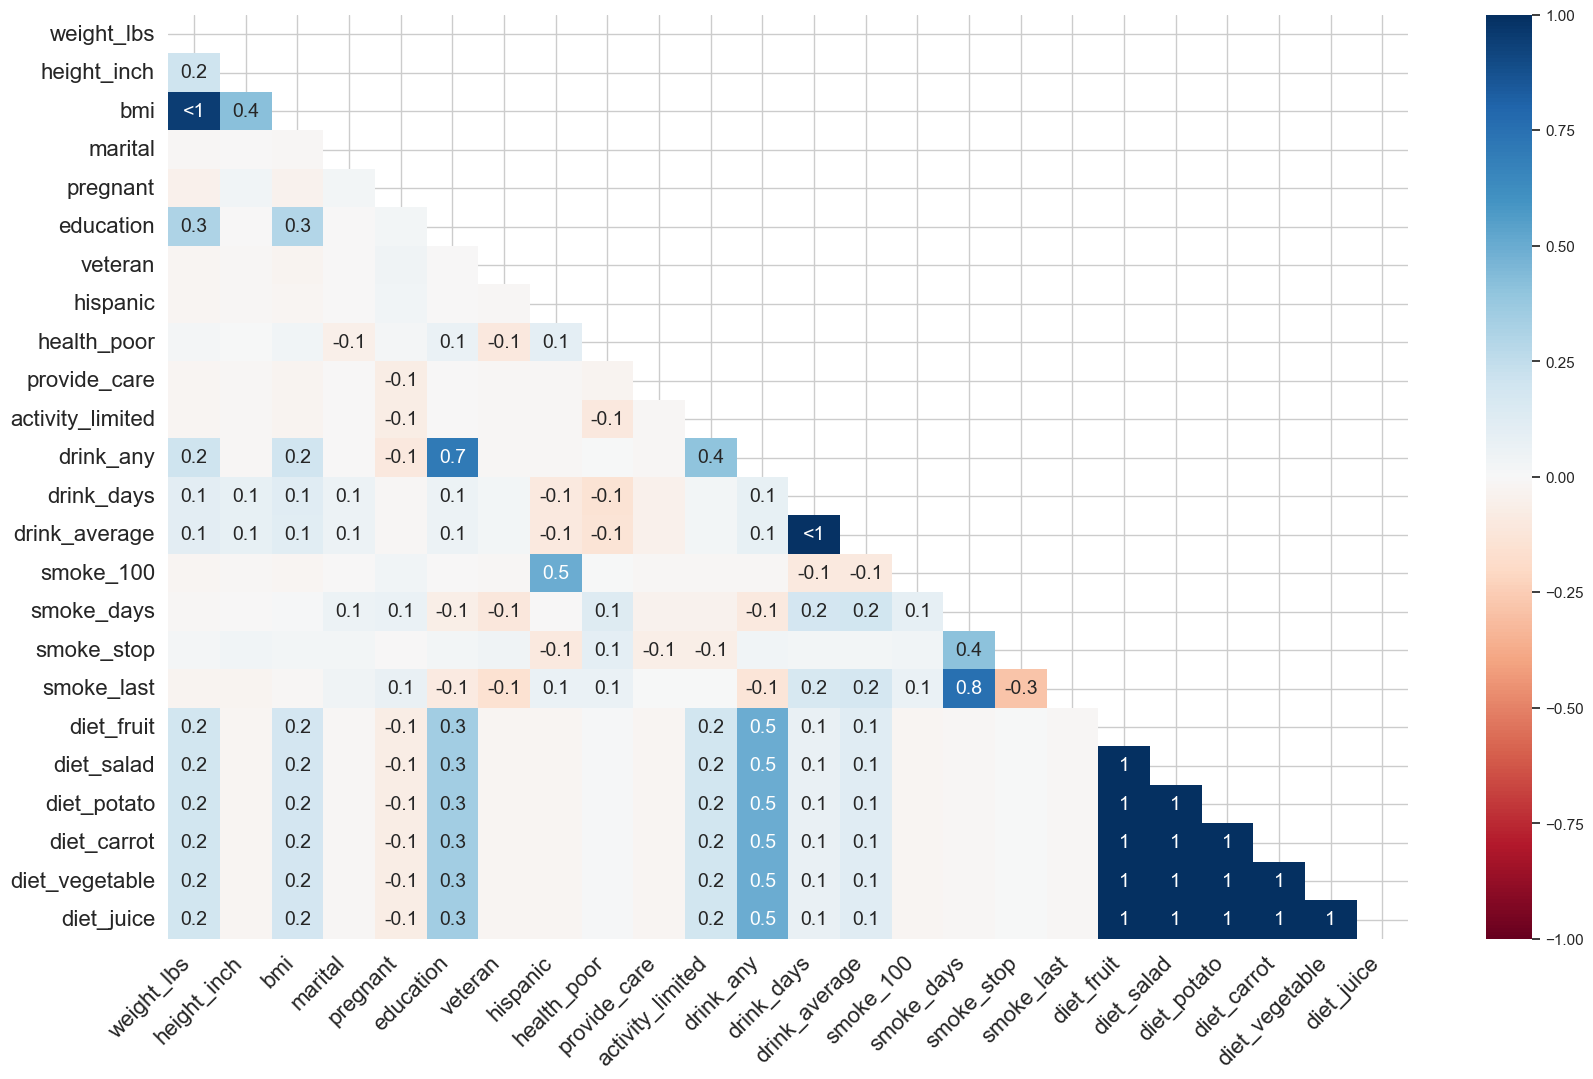

In [69]:
missingno.heatmap(df=riskfactors_df)

Los valores coloreados de azul indican una correlacion positiva, es decir, la presencia de un valor faltante en una de las variables esta correlacionado con un valor faltante en la otra como es el caso de las variables dieta.

Los valores coloreados de rojo simboliza una correlacion negativa, es decir, mientras en una de las variables hay un valor faltante en la otro se tiene un valor completo y vicerversa como en el caso de las variables smoke_last y smoke_stop.

Hay caso donde te puedes encontrar un simbolo de <1 lo que indica que estas cerca del 100% de correlacion bien sea negativa o positiva dependiendo del color.


Dendograma de la variable riskfactors. Se trata de un clustering jerarquica que agrupa las variables con correlaciones muy altas


<Axes: >

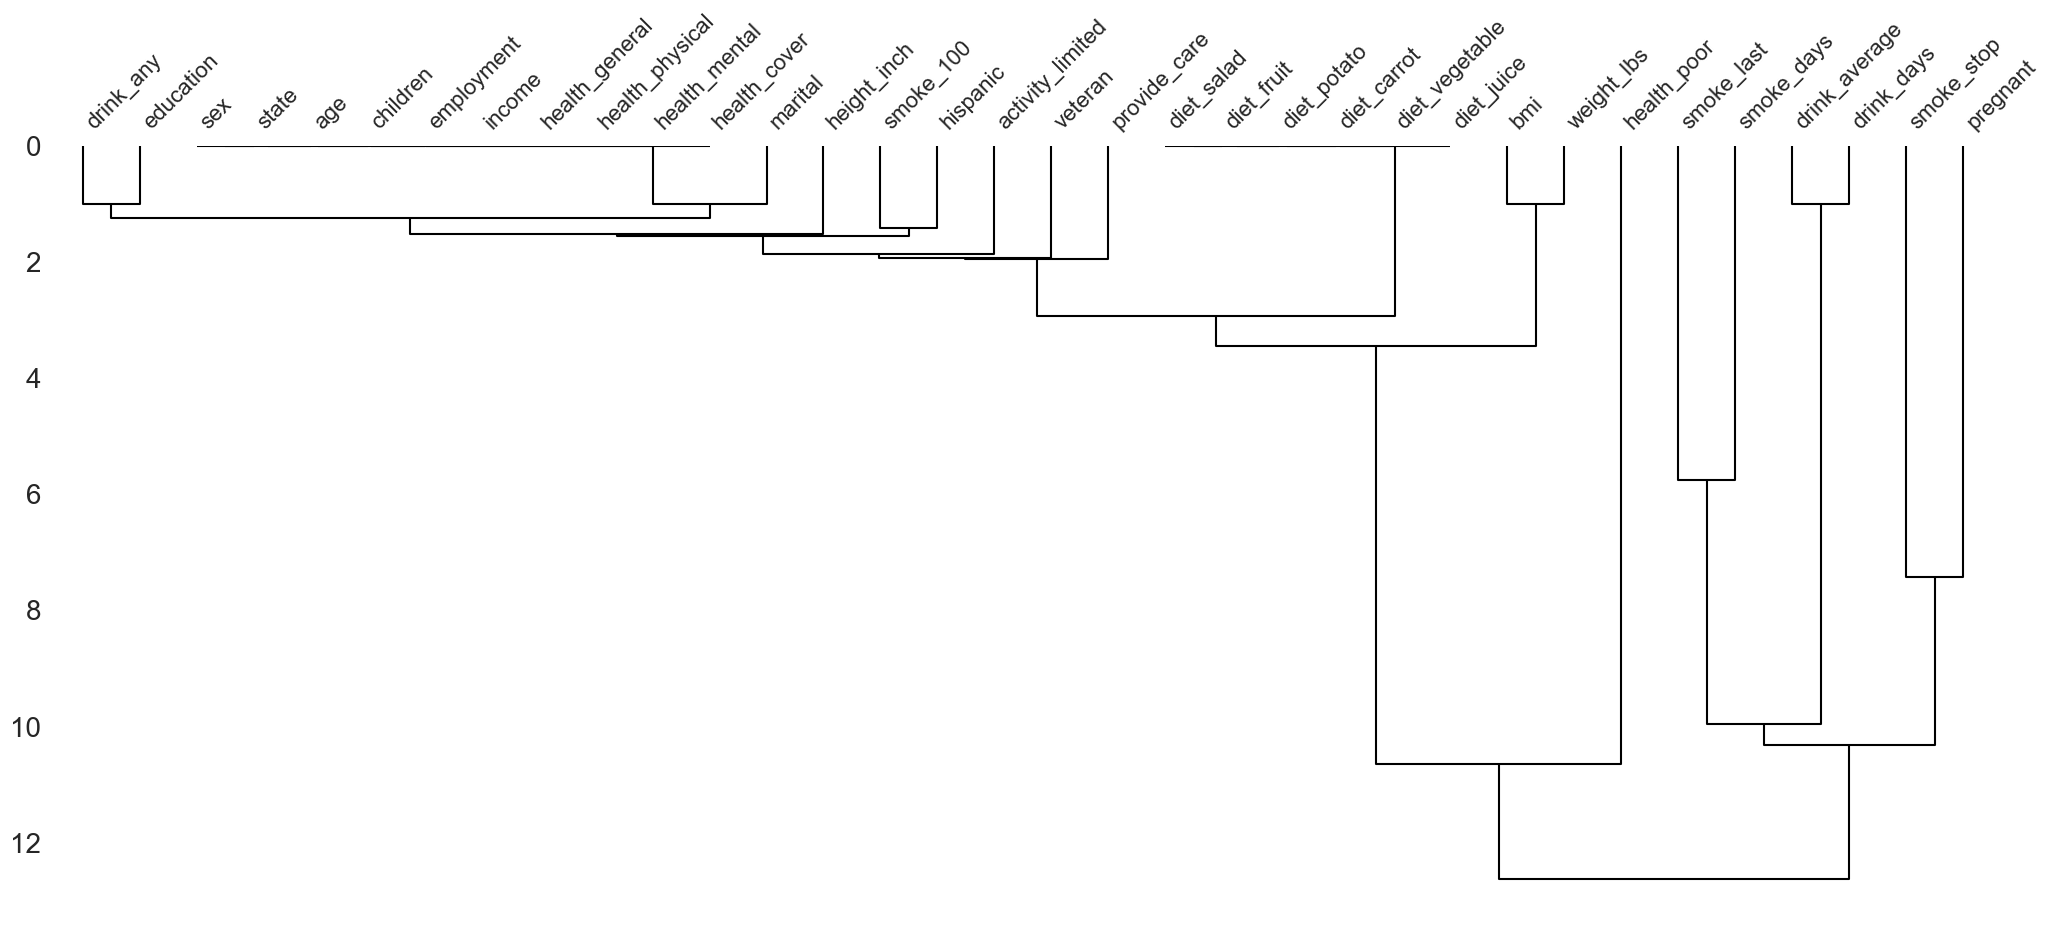

In [70]:
missingno.dendrogram(df=riskfactors_df)

Las variables que estan agrupadas cerca del nivel base indican que la presencia de valores faltantes estan muy relacionadas entre si

Mientras mas separado esten las variables en el diagrama es menos probable que los valores faltantes esten correlacionados entre las columnas.


# Eliminacion de valores faltantes


primero, revisa el numero total de observaciones y variables que tiene tu conjunto de datos.


In [71]:
riskfactors_df.shape

(245, 34)

## Pairwise deletion (Eliminacion por pares)


In [72]:
# #Pandas por defecto,ignora los registros con datos faltantes a la hora de hacer algun calculo

riskfactors_df.weight_lbs.mean()

174.26808510638298

In [73]:
riskfactors_df["weight_lbs"].size, riskfactors_df["weight_lbs"].count()

(245, 235)

In [74]:
riskfactors_df.select_dtypes(exclude="category").mean(skipna=False)

age                58.106122
weight_lbs               NaN
height_inch              NaN
bmi                      NaN
children             0.42449
health_physical     4.118367
health_mental       3.142857
health_poor              NaN
drink_days               NaN
drink_average            NaN
diet_fruit               NaN
diet_salad               NaN
diet_potato              NaN
diet_carrot              NaN
diet_vegetable           NaN
diet_juice               NaN
dtype: object

In [75]:
riskfactors_df["weight_lbs"].mean(skipna=False)

nan

## Listwise deletion or Complete case (Eliminacion por lista o caso completo)


In [76]:
riskfactors_df.dropna(subset=["weight_lbs"], how="any").shape

(235, 34)

Con base a 2 columnas


In [77]:
riskfactors_df.dropna(subset=["weight_lbs", "height_inch"], how="any").shape

(234, 34)

Con base a 2 columnas que tengan valores faltantes en los mismos registros


In [78]:
riskfactors_df.dropna(subset=["weight_lbs", "height_inch"], how="all").shape

(244, 34)

## Representacion Grafica tras la eliminacion de valores faltantes


Con any


<Axes: >

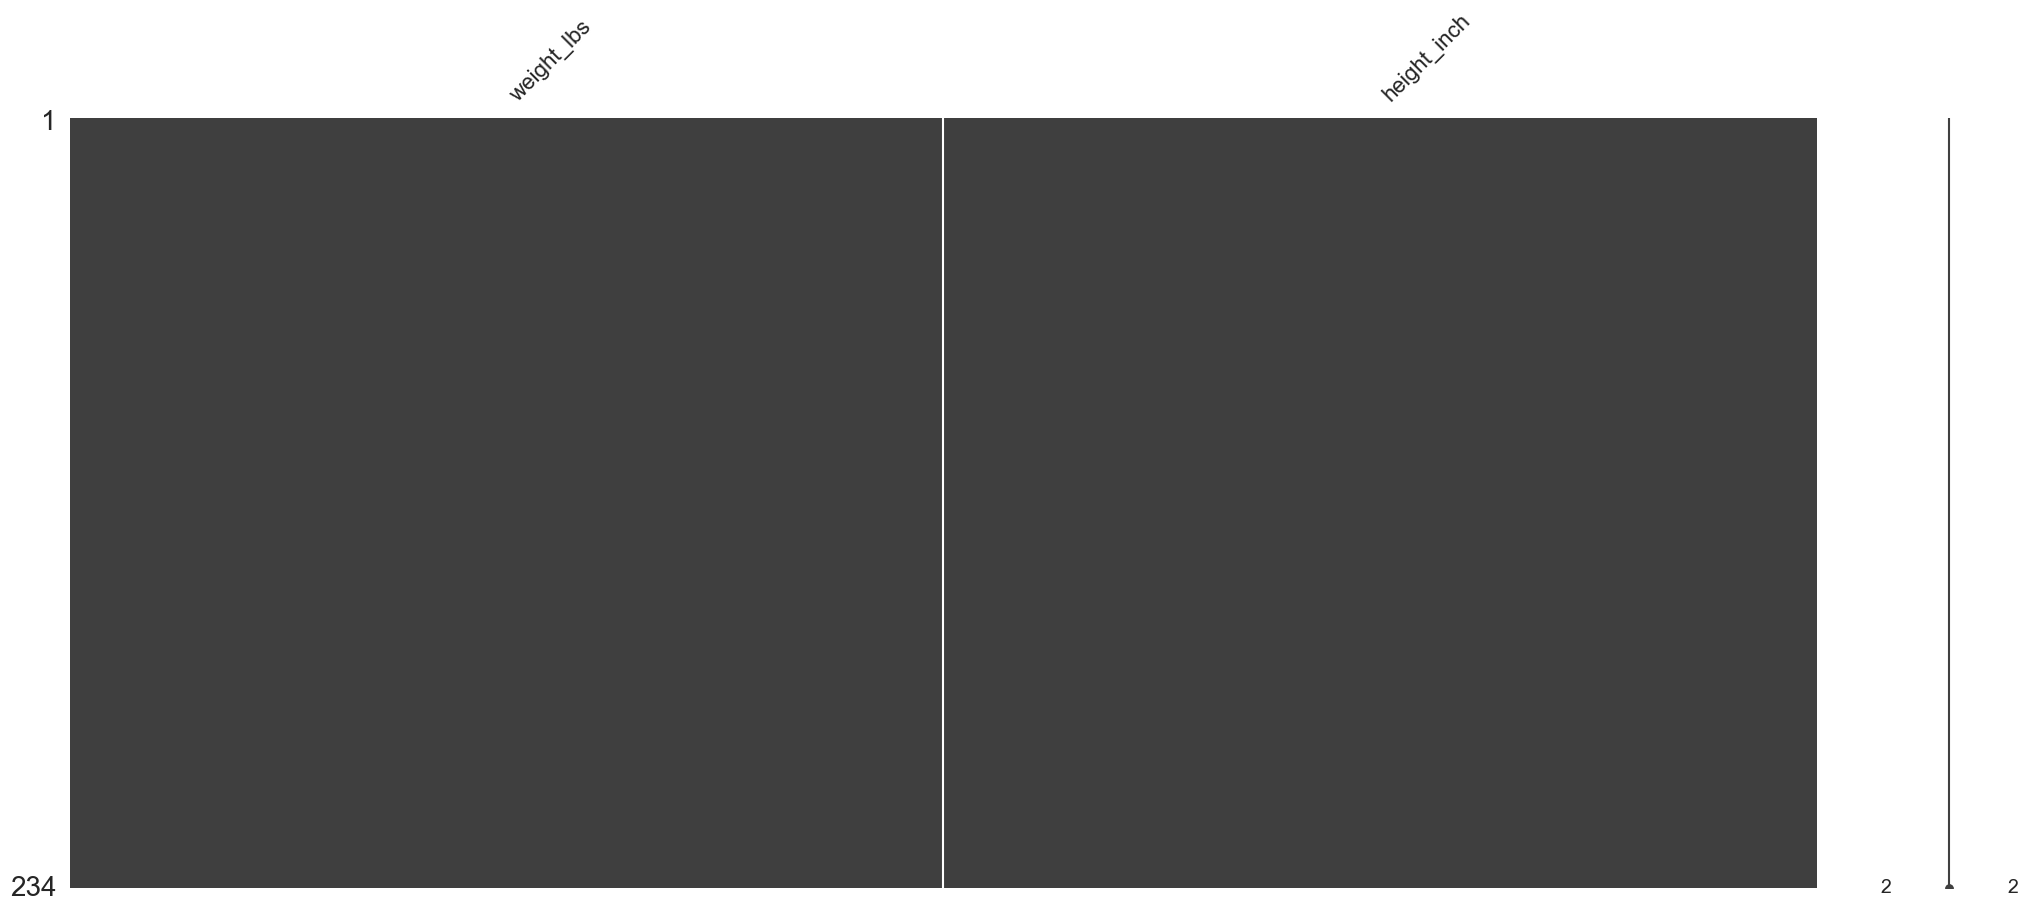

In [79]:
riskfactors_df.dropna(subset=["weight_lbs", "height_inch"], how="any").select_columns(
    ["weight_lbs", "height_inch"]
).pipe(missingno.matrix)

Con all


<Axes: >

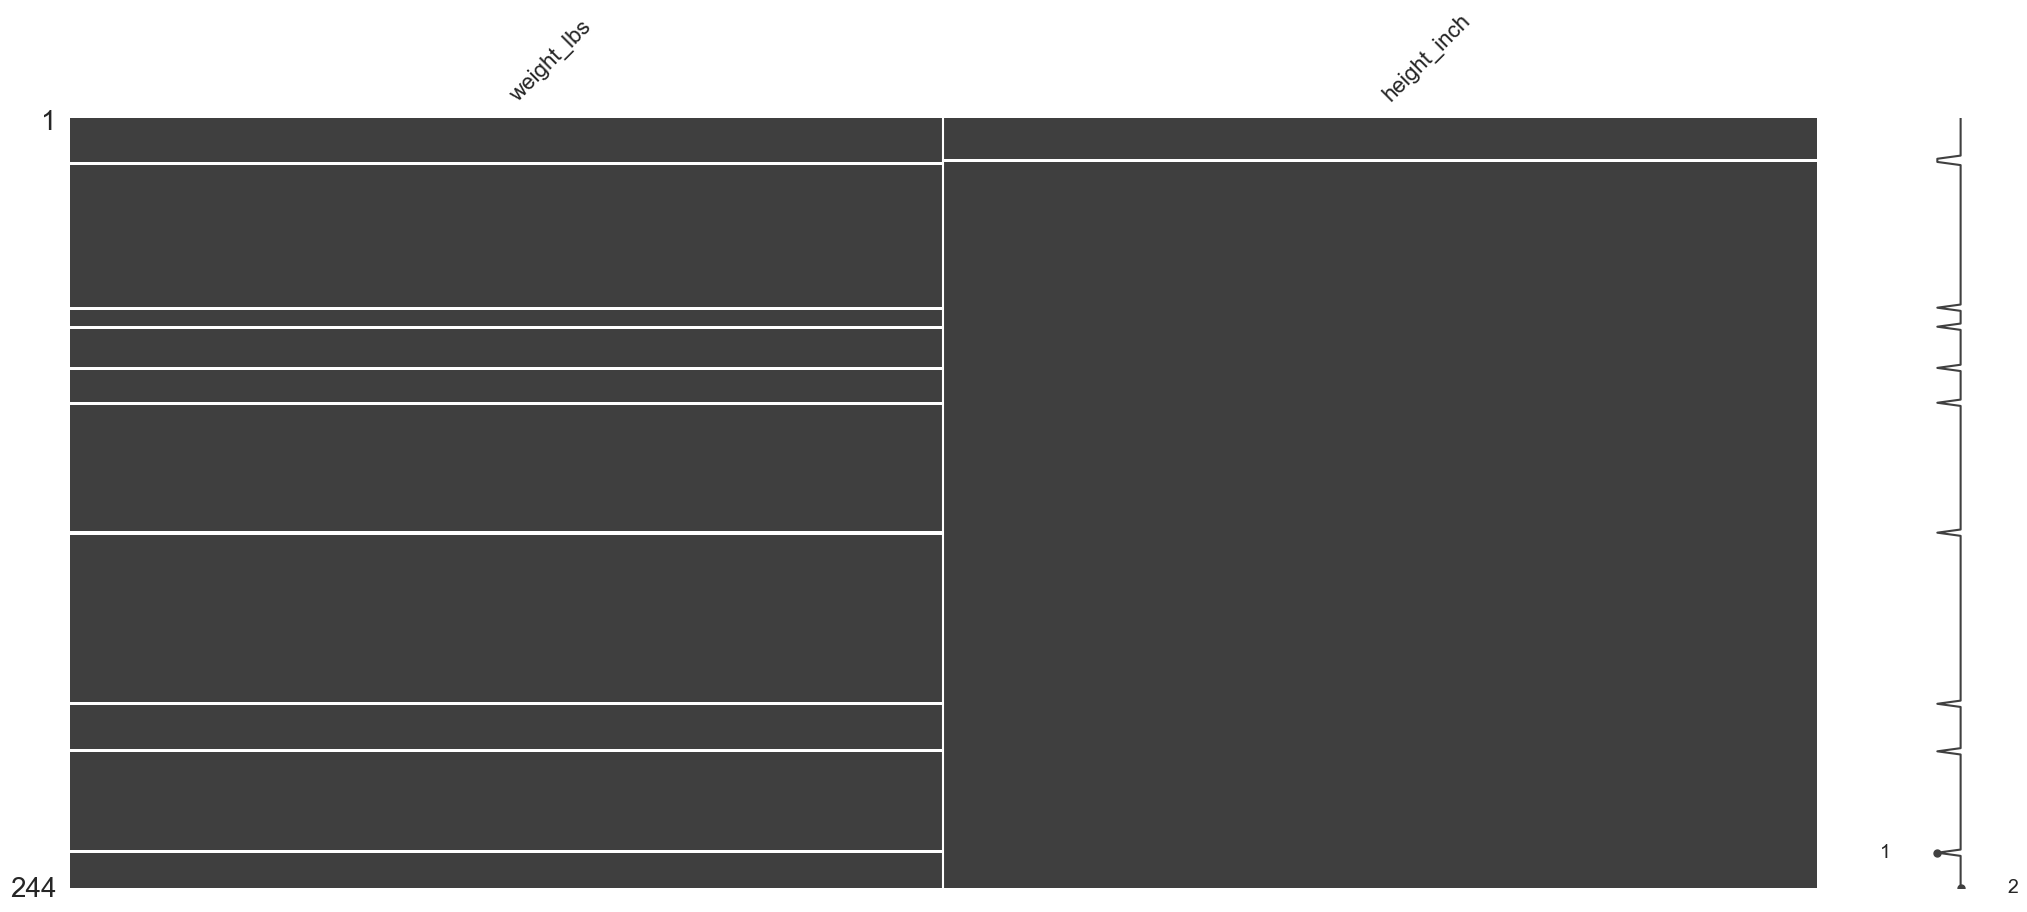

In [80]:
riskfactors_df.dropna(subset=["weight_lbs", "height_inch"], how="all").select_columns(
    ["weight_lbs", "height_inch"]
).pipe(missingno.matrix)

# Imputacion bascia de valores faltantes

## Imputacion con base en el contexto


In [81]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": [
            "morning",
            "afternoon",
            "morning",
            "afternoon",
            "morning",
            "afternoon",
        ],
        "value": [350, 310, 320, 310, 350, 320],
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,310
4,shadowsong,morning,350
5,NaN,afternoon,320


Claramente vemos que los valores de name podemos rellenarlos debido a que el contexto nos indica que son los nombres de la celda de arriba.


In [82]:
implicit_to_explicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,310
4,shadowsong,morning,350
5,shadowsong,afternoon,320


## Imputacion de un unico valor


C:\Users\mike\AppData\Local\Temp\ipykernel_18236\1159133639.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column.fillna(column.mean()) if "_NA" not in column.name else column


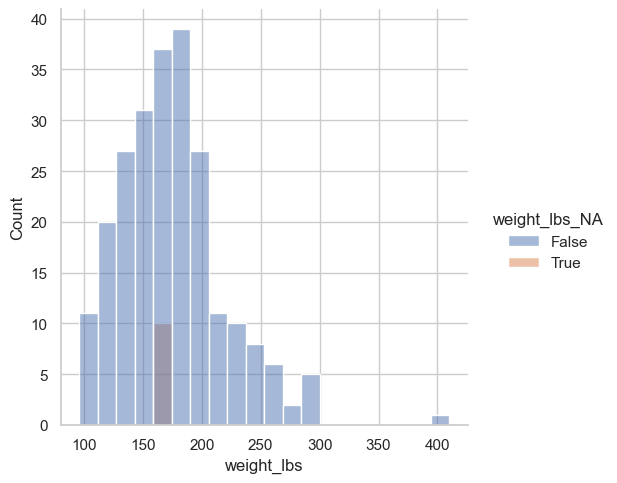

In [84]:
riskfactors_df.select_columns(
    "weight_lbs", "height_inch", "bmi"
).missing.bind_shadow_matrix(true_string=True, false_string=False).apply(
    axis="rows",
    func=lambda column: (
        column.fillna(column.mean()) if "_NA" not in column.name else column
    ),
).pipe(
    lambda df: (sns.displot(data=df, x="weight_lbs", hue="weight_lbs_NA"))
)

C:\Users\mike\AppData\Local\Temp\ipykernel_18236\4234011269.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column.fillna(column.mean()) if "_NA" not in column.name else column


<Axes: xlabel='weight_lbs', ylabel='height_inch'>

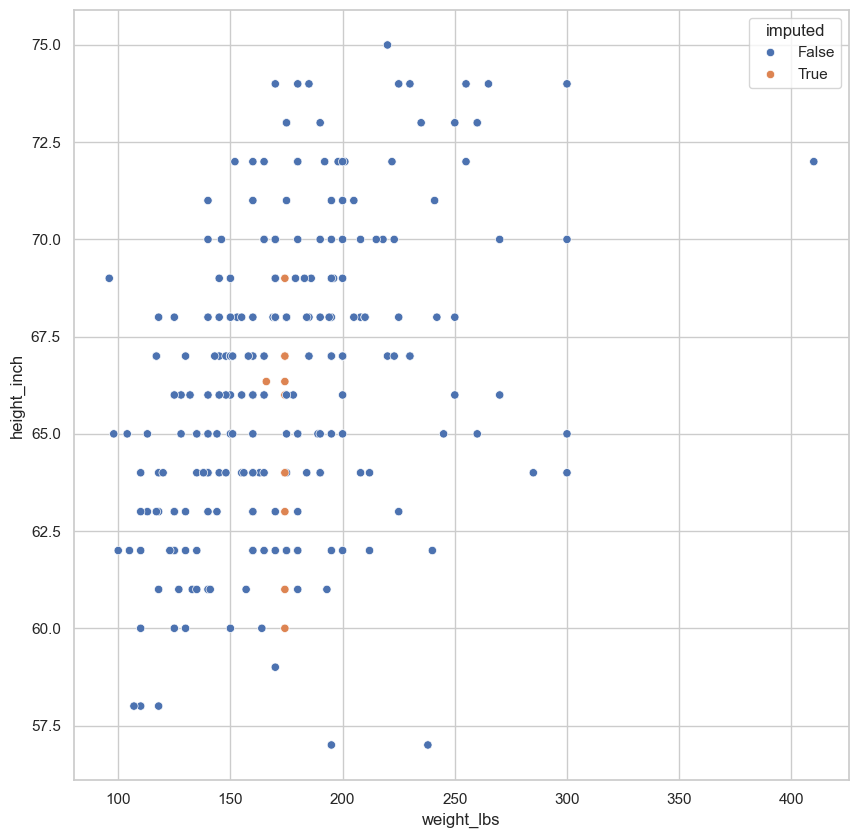

In [86]:
riskfactors_df.select_columns(
    "weight_lbs", "height_inch", "bmi"
).missing.bind_shadow_matrix(true_string=True, false_string=False).apply(
    axis="rows",
    func=lambda column: (
        column.fillna(column.mean()) if "_NA" not in column.name else column
    ),
).assign(
    imputed=lambda df: df["weight_lbs_NA"] | df["height_inch_NA"]
).pipe(
    lambda df: (
        sns.scatterplot(
            data=df,
            x="weight_lbs",
            y="height_inch",
            hue="imputed",
        )
    )
)

# visualización múltiple de imputaciones


C:\Users\mike\AppData\Local\Temp\ipykernel_18236\3867465299.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column.fillna(column.mean()) if "_NA" not in column.name else column


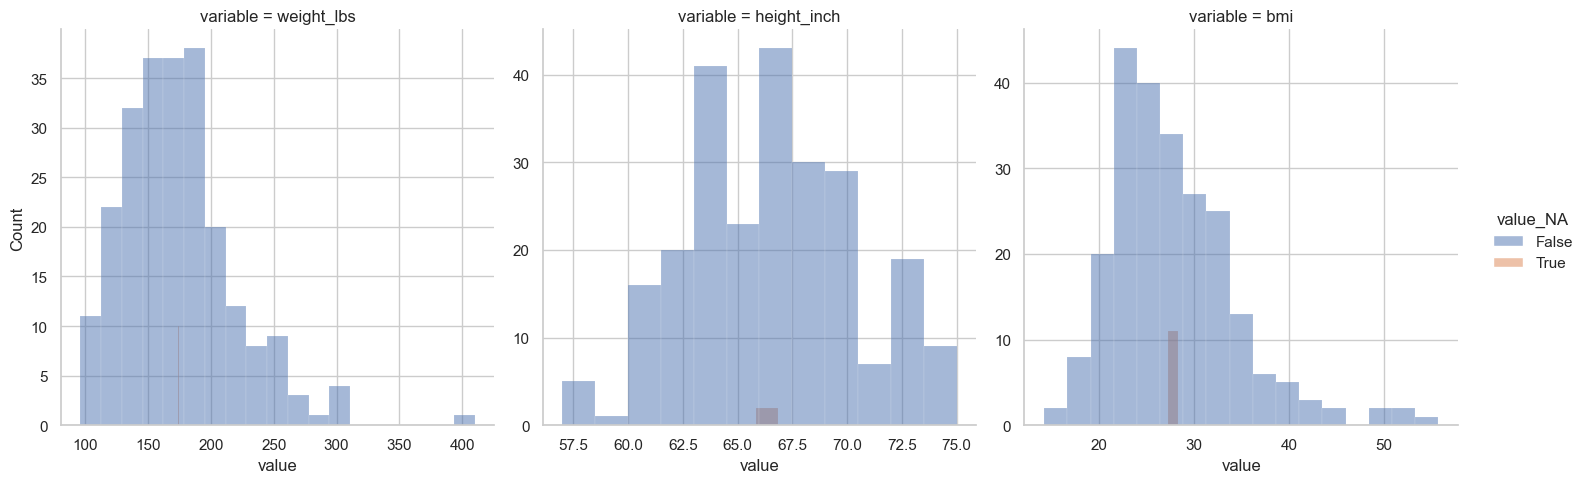

In [94]:
riskfactors_df.select_columns(
    "weight_lbs", "height_inch", "bmi"
).missing.bind_shadow_matrix(true_string=True, false_string=False).apply(
    axis="rows",
    func=lambda column: (
        column.fillna(column.mean()) if "_NA" not in column.name else column
    ),
).pivot_longer(
    index="*_NA"
).pivot_longer(
    index=["variable", "value"], names_to="variable_NA", values_to="value_NA"
).assign(
    valid=lambda df: df.apply(
        axis="columns", func=lambda column: column.variable in column.variable_NA
    )
).query(
    "valid"
).pipe(
    lambda df: (
        sns.displot(
            data=df,
            x="value",
            hue="value_NA",
            col="variable",
            common_bins=False,
            facet_kws={"sharex": False, "sharey": False},
        )
    )
)